## Looking at how fast the sudoku solver works


In [29]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

df = pd.read_csv('sudoku_tst_scores.csv')
df.head()

,date,sudoku,time,difficulty,alg2,version
0,2022-07-30 00:33:22.214405,"""003020600900305001001806400008102900700000008...",0.00232,1,False,v2.11
1,2022-07-30 00:33:22.217619,"""003020600900305001001806400008102900700000008...",0.00216,1,True,v2.11
2,2022-07-30 00:33:22.219949,"""005306078200407005000009106008002034040030010...",0.00167,1,False,v2.11
3,2022-07-30 00:33:22.222150,"""005306078200407005000009106008002034040030010...",0.00155,1,True,v2.11
4,2022-07-30 00:33:22.233287,"""069800500000000103400000020000170000080006000...",0.01052,7,False,v2.11


In [30]:
df_tw = (df
         .assign(sudoku=lambda df_: df_.sudoku.apply(lambda x: x[1:7]),
                 time=df.time * 1000,
                 date=pd.to_datetime(df.date)
            )
        )
df_tw[df_tw.difficulty > 10].tail(20)

,date,sudoku,time,difficulty,alg2,version
1394,2023-03-18 00:11:38.812572,800000,69.71,34,True,v7.2
1395,2023-03-18 00:11:38.886131,005300,72.68,42,True,v7.2
1401,2023-03-18 00:12:23.049411,800000,338.61,175,True,v7.2
1402,2023-03-18 00:12:23.087578,005300,37.30,20,True,v7.2
1408,2023-03-18 00:13:38.972827,800000,341.16,190,True,v7.2
1409,2023-03-18 00:13:39.009648,005300,35.77,20,True,v7.2
1415,2023-03-18 22:21:16.486008,800000,491.80,239,True,v7.2
1416,2023-03-18 22:21:16.530686,005300,43.82,20,True,v7.2
1422,2023-03-18 23:27:10.053211,800000,405.56,191,True,v7.2
1423,2023-03-18 23:27:10.120942,005300,61.09,16,True,v7.2


In [31]:
df_pl = (df_tw
         .groupby(by=['sudoku', 'version'])
         .median()
         .reset_index()
        )
df_pl.shape


(84, 5)

<AxesSubplot:xlabel='sudoku', ylabel='difficulty'>

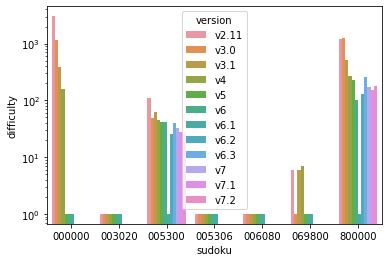

In [32]:
sns.barplot(data=df_pl, x='sudoku', y='difficulty', hue='version', log=True)

In [33]:

df_pl2 = df_tw['version'].value_counts()
df_pl2

v3.1     282
v7.2     210
v2.11    181
v5       159
v3.0     158
v6.1     126
v4       103
v7.1      70
v7        59
v6.2      56
v6.3      38
v6        18
Name: version, dtype: int64

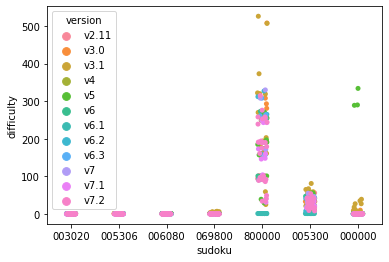

In [34]:
#g = sns.stripplot(data=df_tw[df_tw['Alg2?']==False], x='sudoku', y='Difficulty', hue='Alg2?')
df_tw = df_tw.rename(columns={'Alg2?': 'alg2'})
g = sns.stripplot(data=df_tw.query('alg2==True'), x='sudoku', y='difficulty', hue='version')

<AxesSubplot:xlabel='sudoku', ylabel='time'>

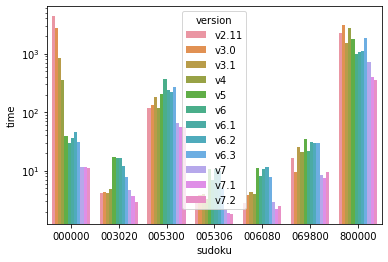

In [35]:
sns.barplot(data=df_pl, x='sudoku', y='time', hue='version', log=True)